In [1]:
import numpy as np
from torch.utils.data import DataLoader

from networks.model import MyModel
from utils.dataset import get_loader
from utils.common import seed_torch

## Setup general parameters

In [2]:
setup = {
    'dataset_dir': '/home/filip/Projekty/ML/datasets/processed/GE3T_20_256x256x192_wmh',
    'struct': 'wmh',
    'epochs': 20,
    'batch_size': 20,
    'seed': 5
}

## Setup model parameters

In [3]:
models = [
    {
        'arch': 'Unet', 'filters': 4, 'lr': 1e-3,
        'loss_fn': 'dice'
    },
    {
        'arch': 'Unet', 'filters': 4, 'lr': 1e-3,
        'loss_fn': 'surface'
    }
]

## Set the seed for deterministic results

In [4]:
seed_torch(10)

## Create train / validation loaders

In [5]:
dataset_dir = setup['dataset_dir']
train_loader = get_loader(dataset_dir, 'train', shuffle = True)
valid_loader = get_loader(dataset_dir, 'valid', shuffle = False)

## For each model setup perform training

In [6]:
model_history = dict()

In [7]:
for model in models:
    my_model = MyModel(struct = setup['struct'])

    history = my_model.train(
        arch = model['arch'],
        epochs = setup['epochs'],
        train_loader = train_loader,
        valid_loader = valid_loader,
        n_filters = model['filters'],
        loss_name = model['loss_fn'],
        learning_rate = model['lr']
    )

    print(history)
    
    model_history[model['loss_fn']] = history

Device: cuda
---------------------------------------------------
Epoch 1 / 20
0.37009795386932925
0.00019756338491932828
Time per epoch: 9.193 seconds
---
Train. loss: 0.9880423449418124
Valid. loss: 0.9819761584786808
---
Train. dice: 0.9880423449418124
Valid. dice: 0.9819761584786808
---
False positive rate: 37.01%
False negative rate: 0.02%
---
FP: 4889105
FN: 12
FP+FN:, 4889117
---
val_loss improved, inf -> 0.9819761584786808
val_loss improved by inf
Saving model: output/models/wmh_Unet_Adam_dice_bs-16_f-4.pt
---------------------------------------------------
Epoch 2 / 20
0.0309432034094608
0.019410602568324005
Time per epoch: 8.546 seconds
---
Train. loss: 0.9827482560101677
Valid. loss: 0.9784380197525024
---
Train. dice: 0.9827482560101677
Valid. dice: 0.9784380197525024
---
False positive rate: 3.09%
False negative rate: 1.94%
---
FP: 408769
FN: 1179
FP+FN:, 409948
---
val_loss improved, 0.9819761584786808 -> 0.9784380197525024
val_loss improved by 0.0035381387261783637
Saving

0.0004670597942514553
0.08243332235758973
Time per epoch: 8.484 seconds
---
Train. loss: 0.1190837744404288
Valid. loss: 0.14158980285420136
---
Train. dice: 0.1190837744404288
Valid. dice: 0.14158980285420136
---
False positive rate: 0.05%
False negative rate: 8.24%
---
FP: 6170
FN: 5007
FP+FN:, 11177
---
val_loss improved, 0.1448945543345283 -> 0.14158980285420136
val_loss improved by 0.0033047514803269396
Saving model: output/models/wmh_Unet_Adam_dice_bs-16_f-4.pt
---------------------------------------------------
Epoch 18 / 20
0.00020945777158732203
0.1336187026671057
Time per epoch: 8.476 seconds
---
Train. loss: 0.10323949596461128
Valid. loss: 0.14492452144622803
---
Train. dice: 0.10323949596461128
Valid. dice: 0.14492452144622803
---
False positive rate: 0.02%
False negative rate: 13.36%
---
FP: 2767
FN: 8116
FP+FN:, 10883
---
val_loss did not improved (0.14492452144622803), 1 / 20
---------------------------------------------------
Epoch 19 / 20
8.001332293740491e-05
0.21987

0.0
1.0
Time per epoch: 21.328 seconds
---
Train. loss: 10.261558350394754
Valid. loss: 9.432813981000114
---
Train. dice: 0.9853515844134724
Valid. dice: 0.984751771478092
---
False positive rate: 0.00%
False negative rate: 100.00%
---
FP: 0
FN: 60740
FP+FN:, 60740
---
val_loss improved, 10.076546220218434 -> 9.432813981000114
val_loss improved by 0.6437322392183198
Saving model: output/models/wmh_Unet_Adam_surface_bs-16_f-4.pt
---------------------------------------------------
Epoch 10 / 20
0.030066690385532502
0.7710240368784985
Time per epoch: 21.891 seconds
---
Train. loss: 9.283197725520415
Valid. loss: 9.321745928596048
---
Train. dice: 0.9837479845565908
Valid. dice: 0.9791466453496147
---
False positive rate: 3.01%
False negative rate: 77.10%
---
FP: 397190
FN: 46832
FP+FN:, 444022
---
val_loss improved, 9.432813981000114 -> 9.321745928596048
val_loss improved by 0.11106805240406636
Saving model: output/models/wmh_Unet_Adam_surface_bs-16_f-4.pt
-------------------------------

In [8]:
model_history

{'dice': {'losses': [0.9880423449418124,
   0.9827482560101677,
   0.9780621028998319,
   0.969145697705886,
   0.9484938549644807,
   0.8930406544138404,
   0.7367543621974832,
   0.48143797849907594,
   0.3031318897710127,
   0.22964591138503132,
   0.1881514252985225,
   0.1663170360467013,
   0.14221402827431173,
   0.1359252938452889,
   0.1325106094865238,
   0.12074821924462038,
   0.1190837744404288,
   0.10323949596461128,
   0.10059232045622434,
   0.09987694989232455],
  'val_losses': [0.9819761584786808,
   0.9784380197525024,
   0.9736821721581852,
   0.9606484560405507,
   0.9240212896290947,
   0.8538369290968951,
   0.6438659078934613,
   0.475346680949716,
   0.32740381885977354,
   0.3024624270551345,
   0.21986528003917022,
   0.20867945867426255,
   0.18278794779497035,
   0.17261794384788065,
   0.16595294896294088,
   0.1448945543345283,
   0.14158980285420136,
   0.14492452144622803,
   0.18842510616078095,
   0.1439499995287727],
  'dices': [0.9880423449418124,


## Plots

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [13]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

In [ ]:
epochs = np.arange(setup['epochs'])

### Loss / Validation loss plot

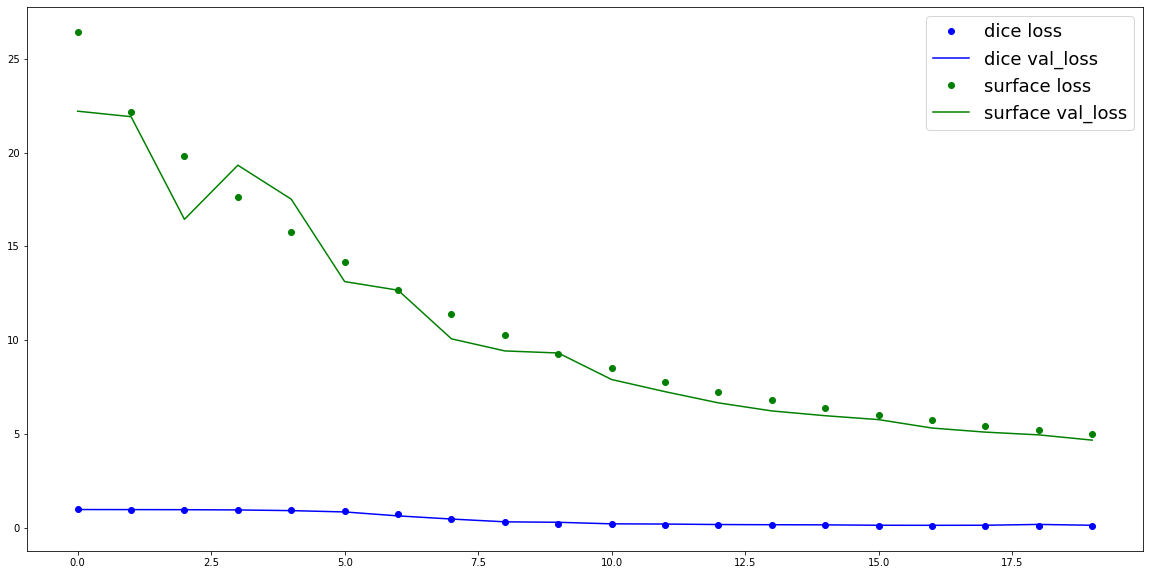

In [35]:
fig = plt.figure(figsize=(20,10))

for i, model in enumerate(models):
    plt.plot(epochs, model_history[model['loss_fn']]['losses'], 'o', color=colors[i], label=f"{model['loss_fn']} loss")
    plt.plot(epochs, model_history[model['loss_fn']]['val_losses'], color=colors[i], label=f"{model['loss_fn']} val_loss")

plt.legend(loc=1, prop={'size': 18})
plt.show()

### Falses total plot

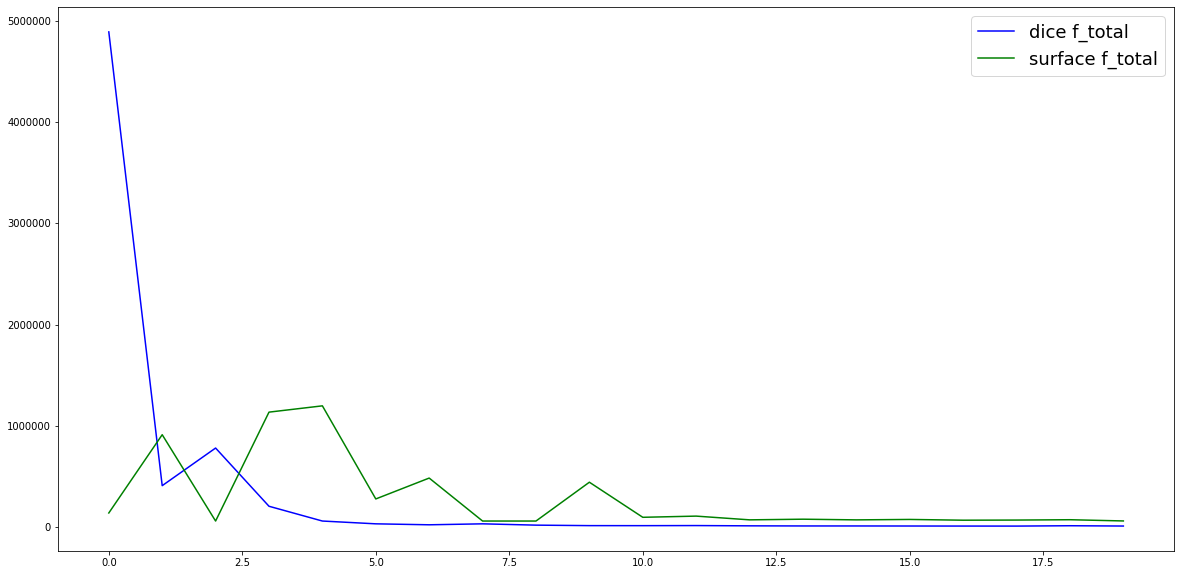

In [38]:
fig = plt.figure(figsize=(20,10))

for i, model in enumerate(models):
    plt.plot(epochs, model_history[model['loss_fn']]['f_total'], color=colors[i], label=f"{model['loss_fn']} f_total")

plt.legend(loc=1, prop={'size': 18})
plt.show()

### False positive plot

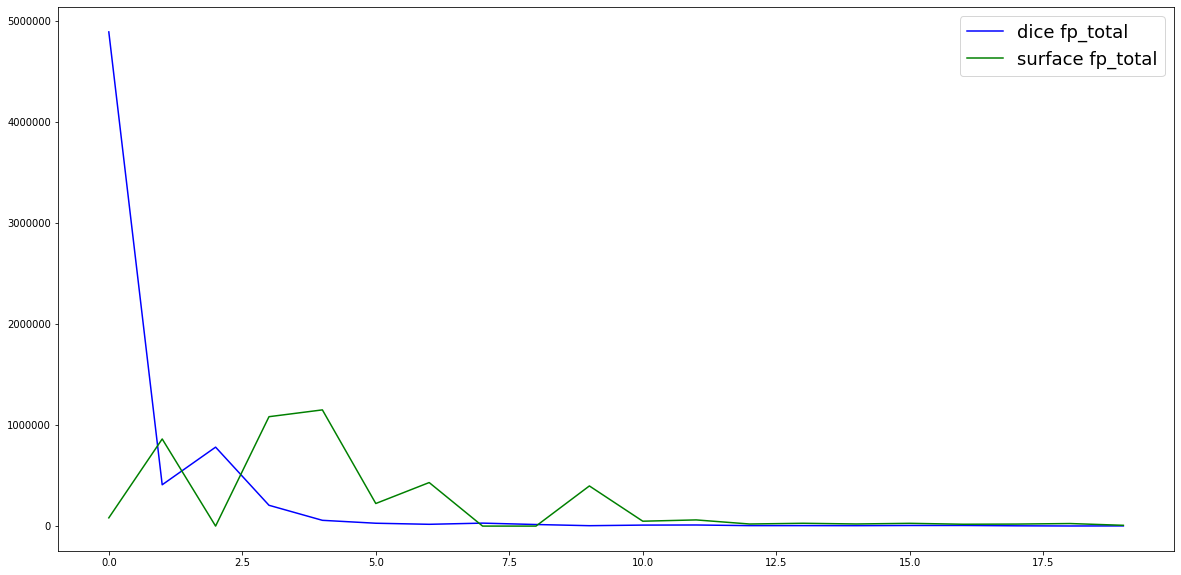

In [43]:
fig = plt.figure(figsize=(20,10))

for i, model in enumerate(models):
    plt.plot(epochs, model_history[model['loss_fn']]['fp_total'], color=colors[i], label=f"{model['loss_fn']} fp_total")

plt.legend(loc=1, prop={'size': 18})
plt.show()

### False negative plot

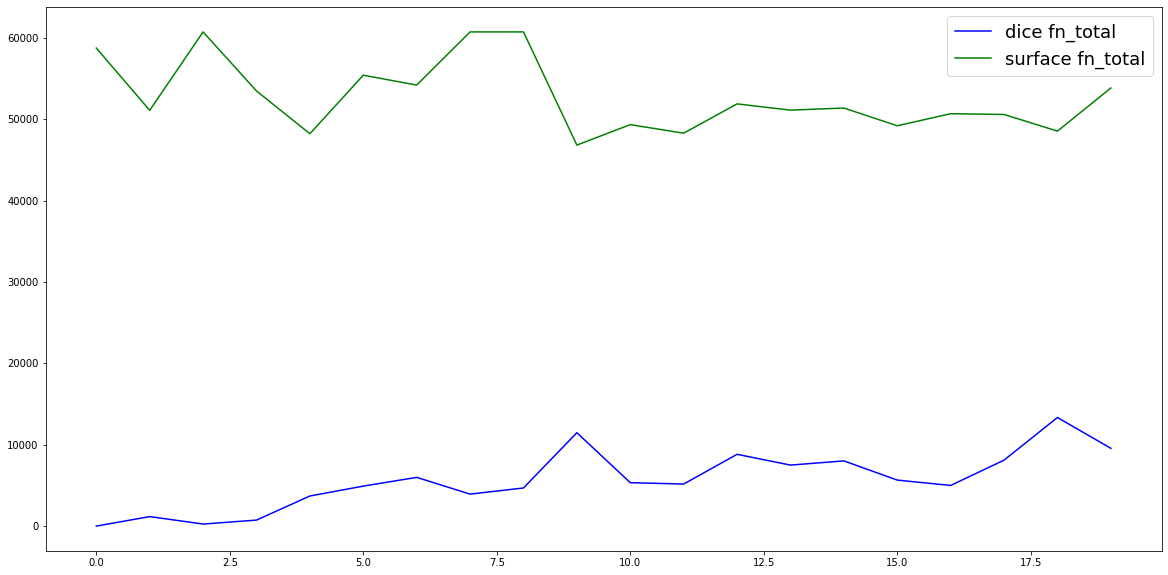

In [44]:
fig = plt.figure(figsize=(20,10))

for i, model in enumerate(models):
    plt.plot(epochs, model_history[model['loss_fn']]['fn_total'], color=colors[i], label=f"{model['loss_fn']} fn_total")

plt.legend(loc=1, prop={'size': 18})
plt.show()

### False positive and false negative rates

In [52]:
a = [float(x.strip('%'))/100 for x in model_history['dice']['fn_rate']]
a

[0.0002,
 0.0194,
 0.0043,
 0.0123,
 0.0611,
 0.08109999999999999,
 0.0987,
 0.0649,
 0.07730000000000001,
 0.1892,
 0.08800000000000001,
 0.08529999999999999,
 0.1454,
 0.12359999999999999,
 0.1321,
 0.0933,
 0.0824,
 0.1336,
 0.21989999999999998,
 0.1576]

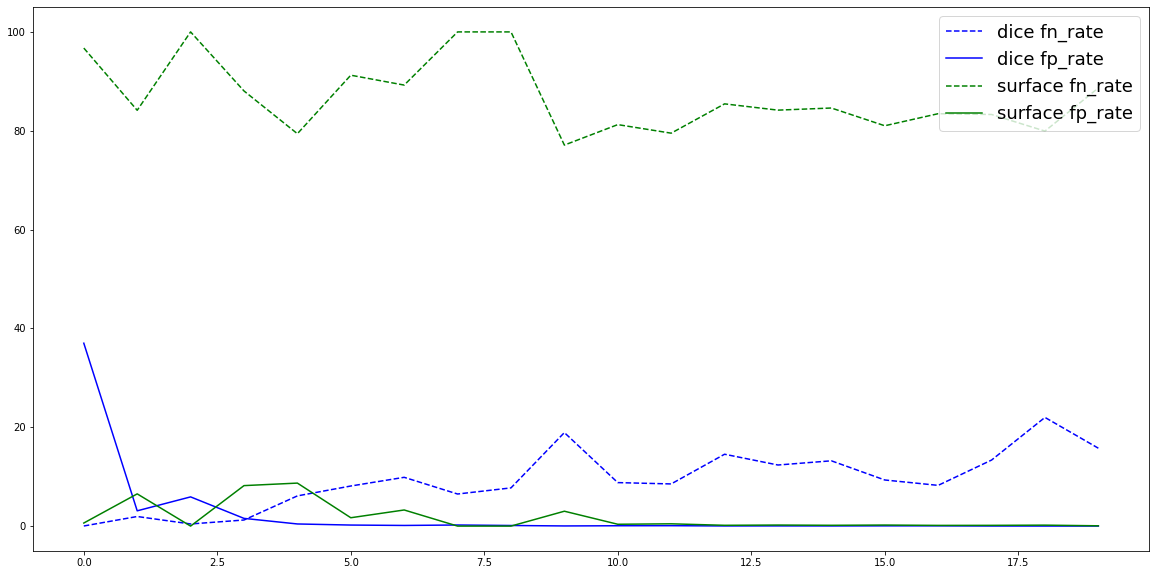

In [57]:
fig = plt.figure(figsize=(20,10))

for i, model in enumerate(models):
    fn_rates = [float(x.strip('%')) for x in model_history[model['loss_fn']]['fn_rate']]
    fp_rates = [float(x.strip('%')) for x in model_history[model['loss_fn']]['fp_rate']]
    
    plt.plot(epochs, fn_rates, color=colors[i], label=f"{model['loss_fn']} fn_rate", linestyle='--')
    plt.plot(epochs, fp_rates, color=colors[i], label=f"{model['loss_fn']} fp_rate")

plt.legend(loc=1, prop={'size': 18})
plt.show()